## Econ 430
### UCLA, Master of Quantitative Economics
#### Dr. Randall R. Rojas

## Example: Exploratory Analysis

For this example we will use the dataset [Auto-MPG -UCI Machine Learning Library](http://archive.ics.uci.edu/ml/index.php). For anlayses done on this dataset, please check [kaggle](https://www.kaggle.com/uciml/autompg-dataset). Lastly, several of the code chunks have been adapted from [D. Besain's](https://www.kaggle.com/devanshbesain/exploration-and-analysis-auto-mpg) notebook.

In [1]:
# Import all the neccessary packages
import statistics
import numpy as np
import pandas as pd
from pandas import DataFrame as df 
from scipy import io as spio
from scipy import stats
import matplotlib.pyplot as plt
from scipy import misc
from scipy.stats import norm
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
# 1:  Load the data and check its contents
data = sns.load_dataset("mpg")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
# 2a: Inspect the data
print(data.head())
# We can also check the last observations with:
# print(data.tail())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [4]:
# 2b: Look at the data index
print(data.index)

RangeIndex(start=0, stop=398, step=1)


In [5]:
# 2c: Check the names of variables provided
print(data.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')


In [6]:
# 2d: Data dimensions
data.shape

(398, 9)

In [7]:
#2e: Check if there are any missing observations
print(data.isnull().any())

# Since there missing obs, count how many per variable
print(data.isnull().sum())

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


In [8]:
# Replace 'NaN' with the mean value -only needed for horsepower
from numpy import nan
avg_horsepower = data['horsepower'].astype('float').mean(axis=0)
data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [9]:
# Check one more time that we no longer have NaN's
print(data.isnull().any())

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool


In [10]:
# 3: Summary Statistics
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


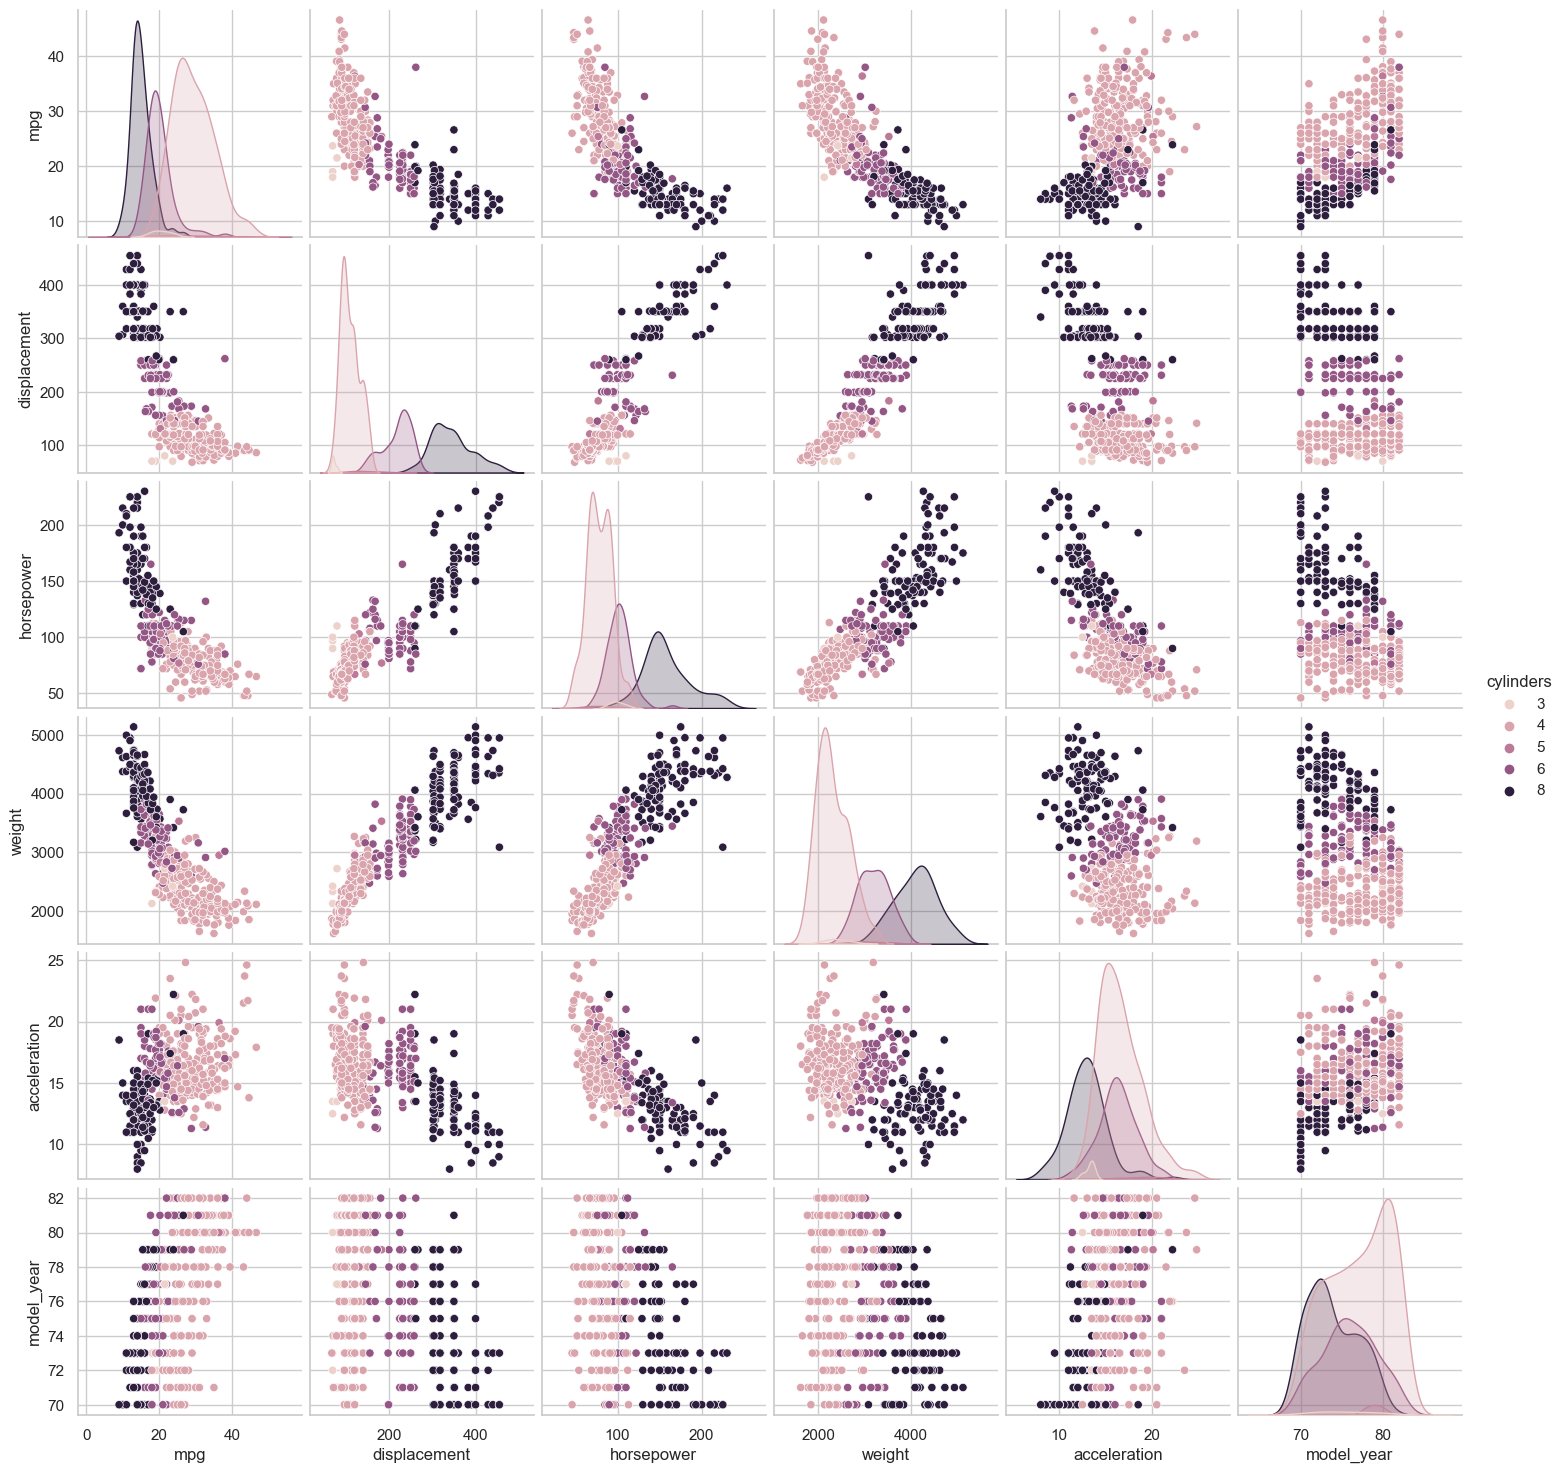

In [6]:
# 4: Scatterplot Matrix
sns.pairplot(data, hue="cylinders")

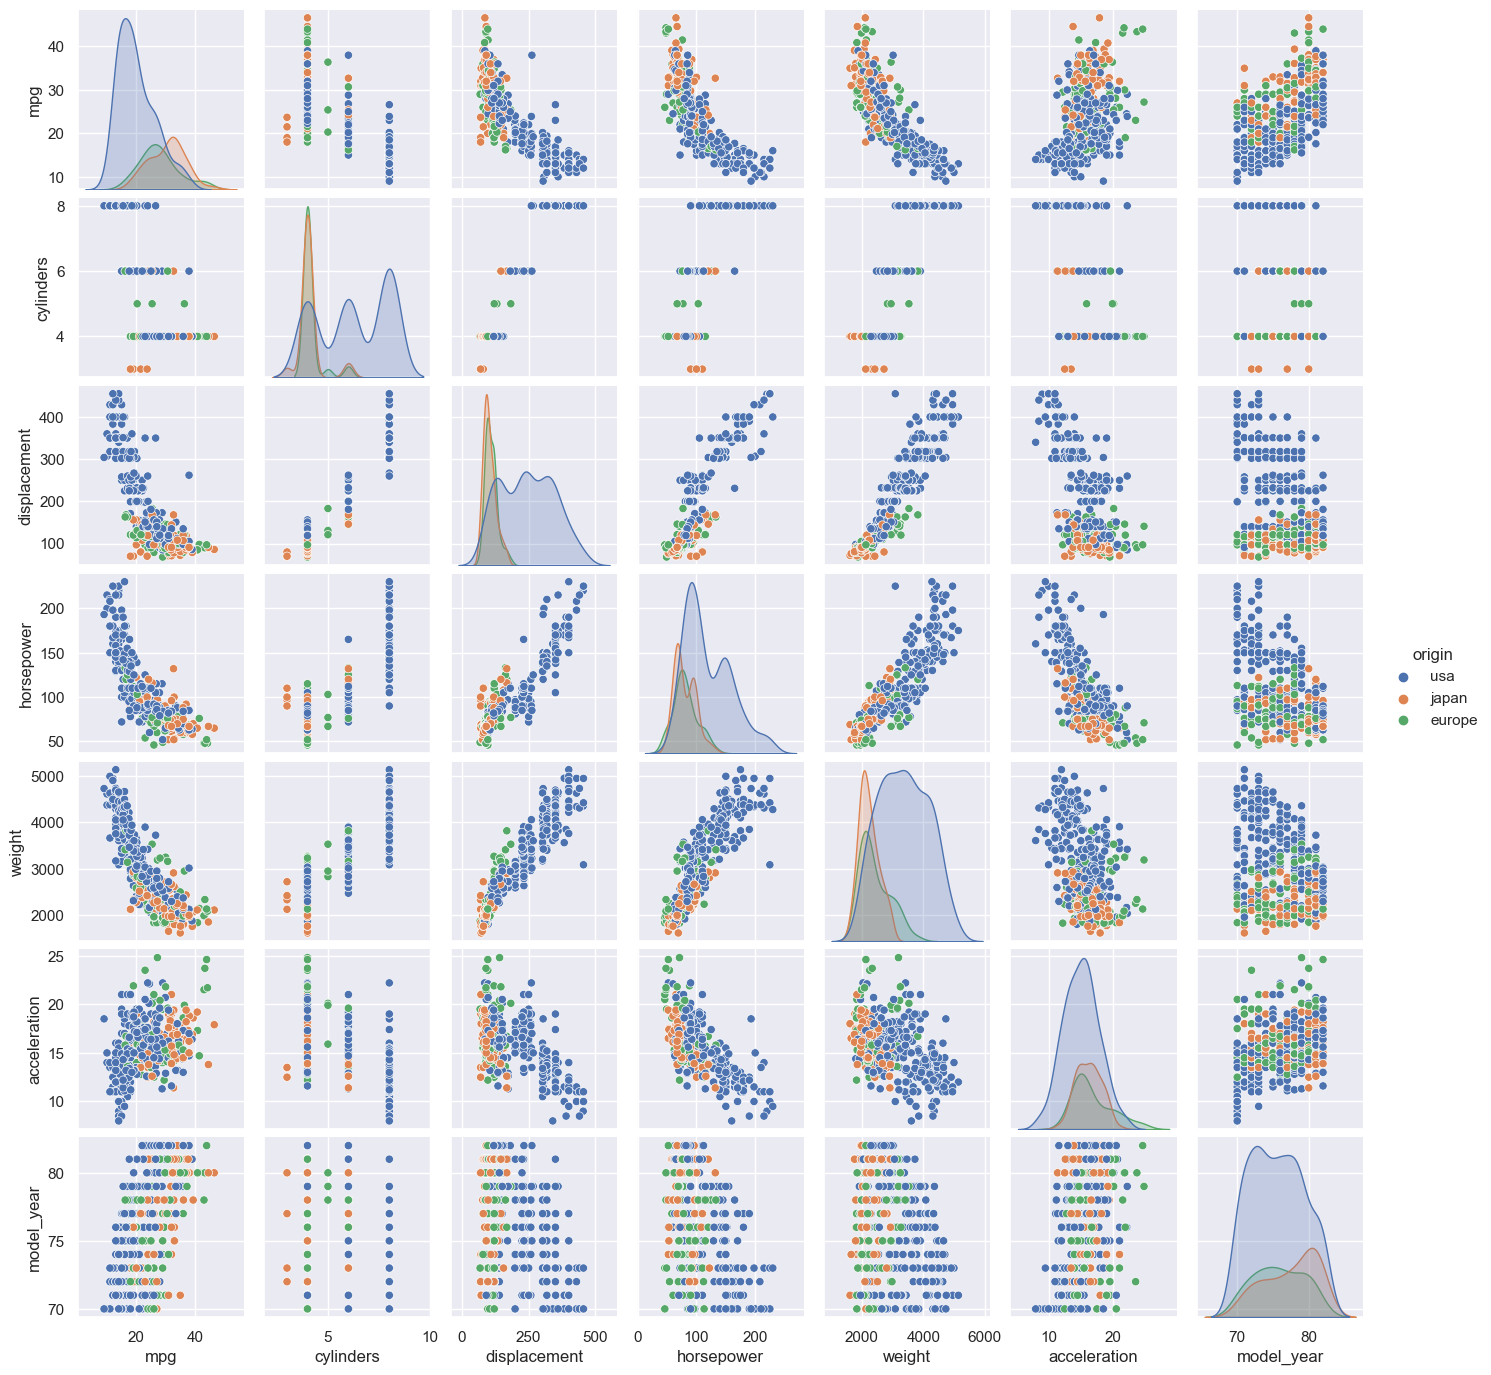

In [7]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.0,hue ='origin')
plt.show()

In [8]:
# 4: Boxplot Comparisons
# We can compare e.g., by country, number of cylinders, and by year
print(data.cylinders.unique())
print(data.origin.unique())

[8 4 6 3 5]
['usa' 'japan' 'europe']


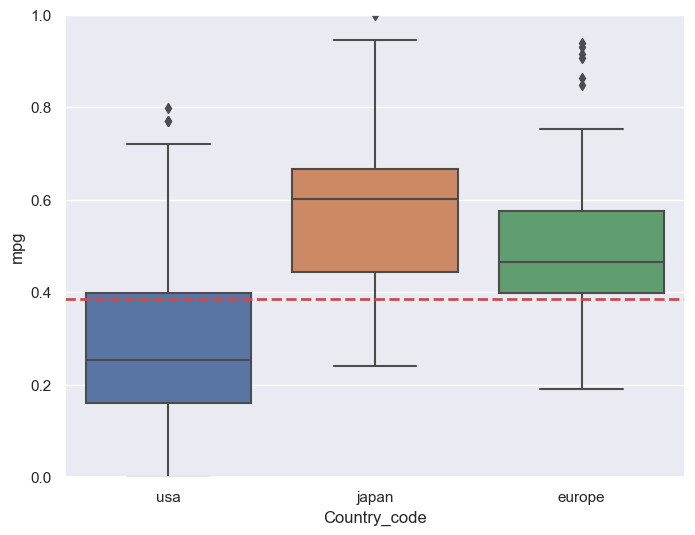

In [15]:
# (a) By Country
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b
data_scale = data.copy()
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

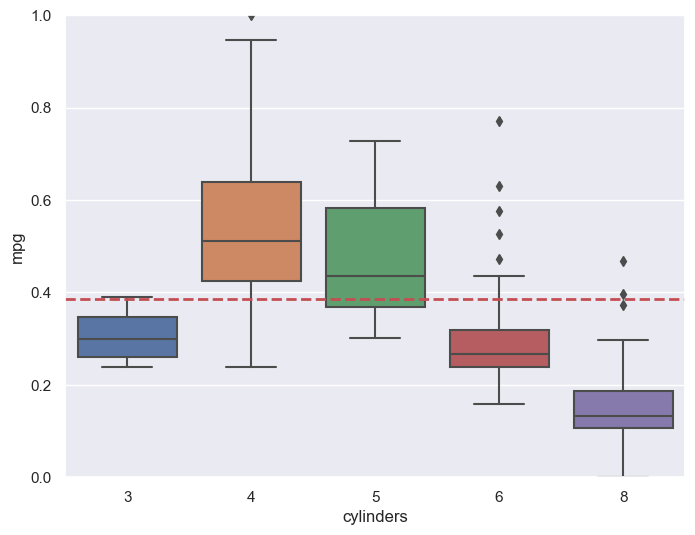

In [16]:
# (b) By Number of Cylinders
var = 'cylinders'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

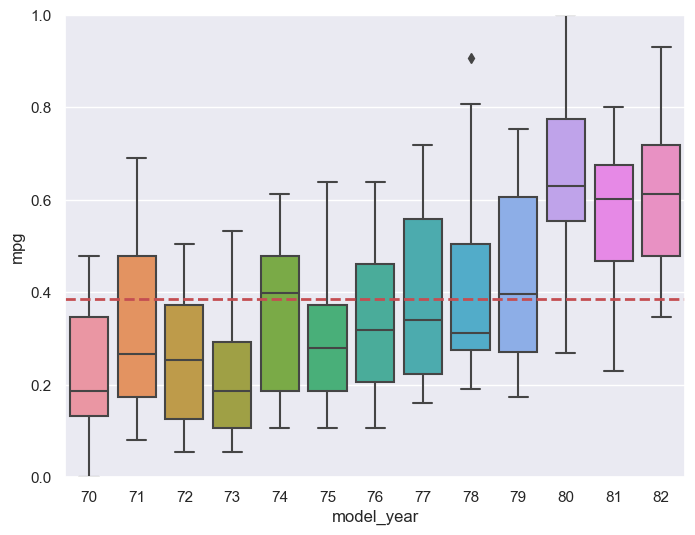

In [17]:
# (c) By Year
var = 'model_year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

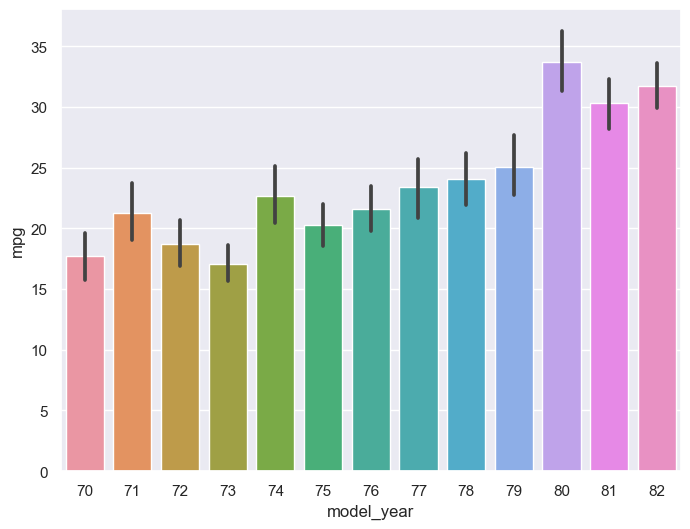

In [18]:
# We can also consider a barchart of the means w/ the std.dev
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.barplot(data=data, x="model_year", y="mpg",
           estimator=np.average)

In [19]:
# 5: Correlation Matrix
plt.figure(figsize=(13,7))
c= data.corr()
sns.heatmap(c,cmap="Blues",annot=True,square = True)

ValueError: could not convert string to float: 'usa'

<Figure size 1300x700 with 0 Axes>

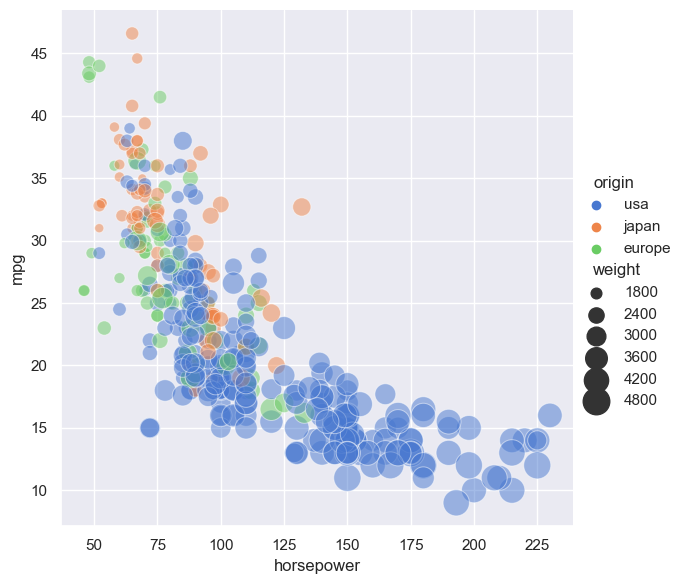

In [20]:
# 6: Look at bivariate scatterplots in more detail
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

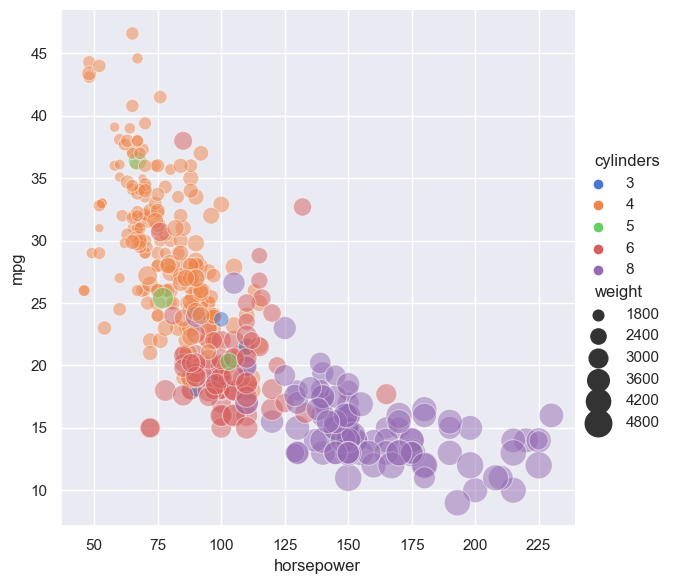

In [21]:
sns.relplot(x="horsepower", y="mpg", hue="cylinders", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

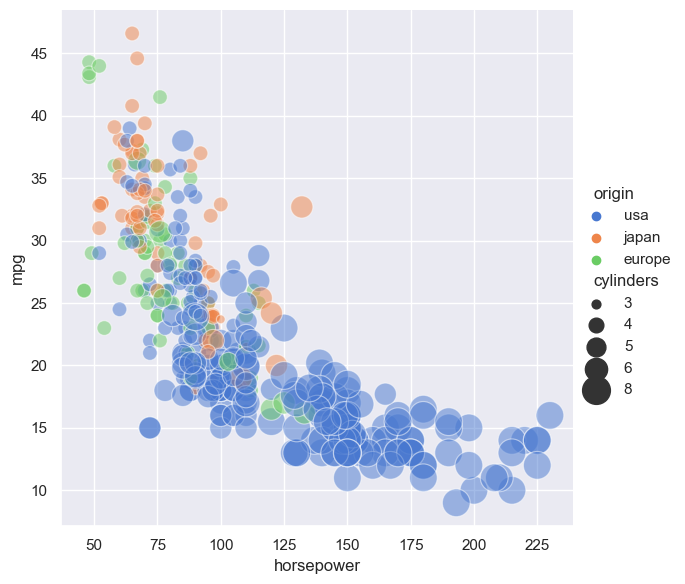

In [22]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="cylinders",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

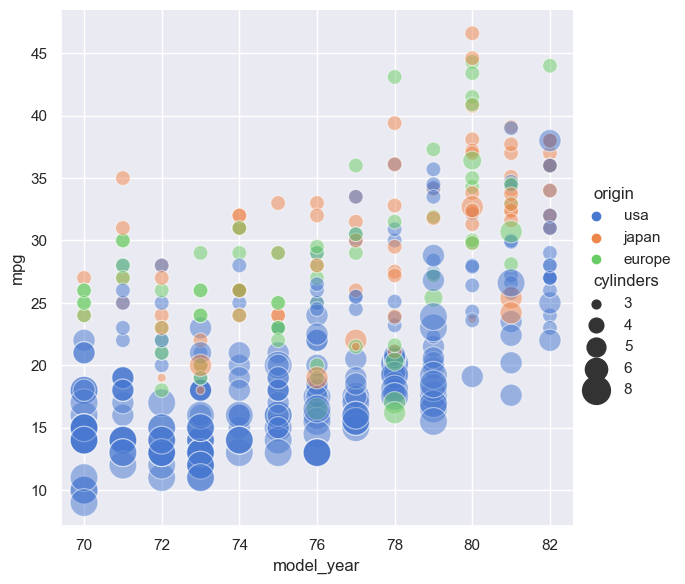

In [23]:
sns.relplot(x="model_year", y="mpg", hue="origin", size="cylinders",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

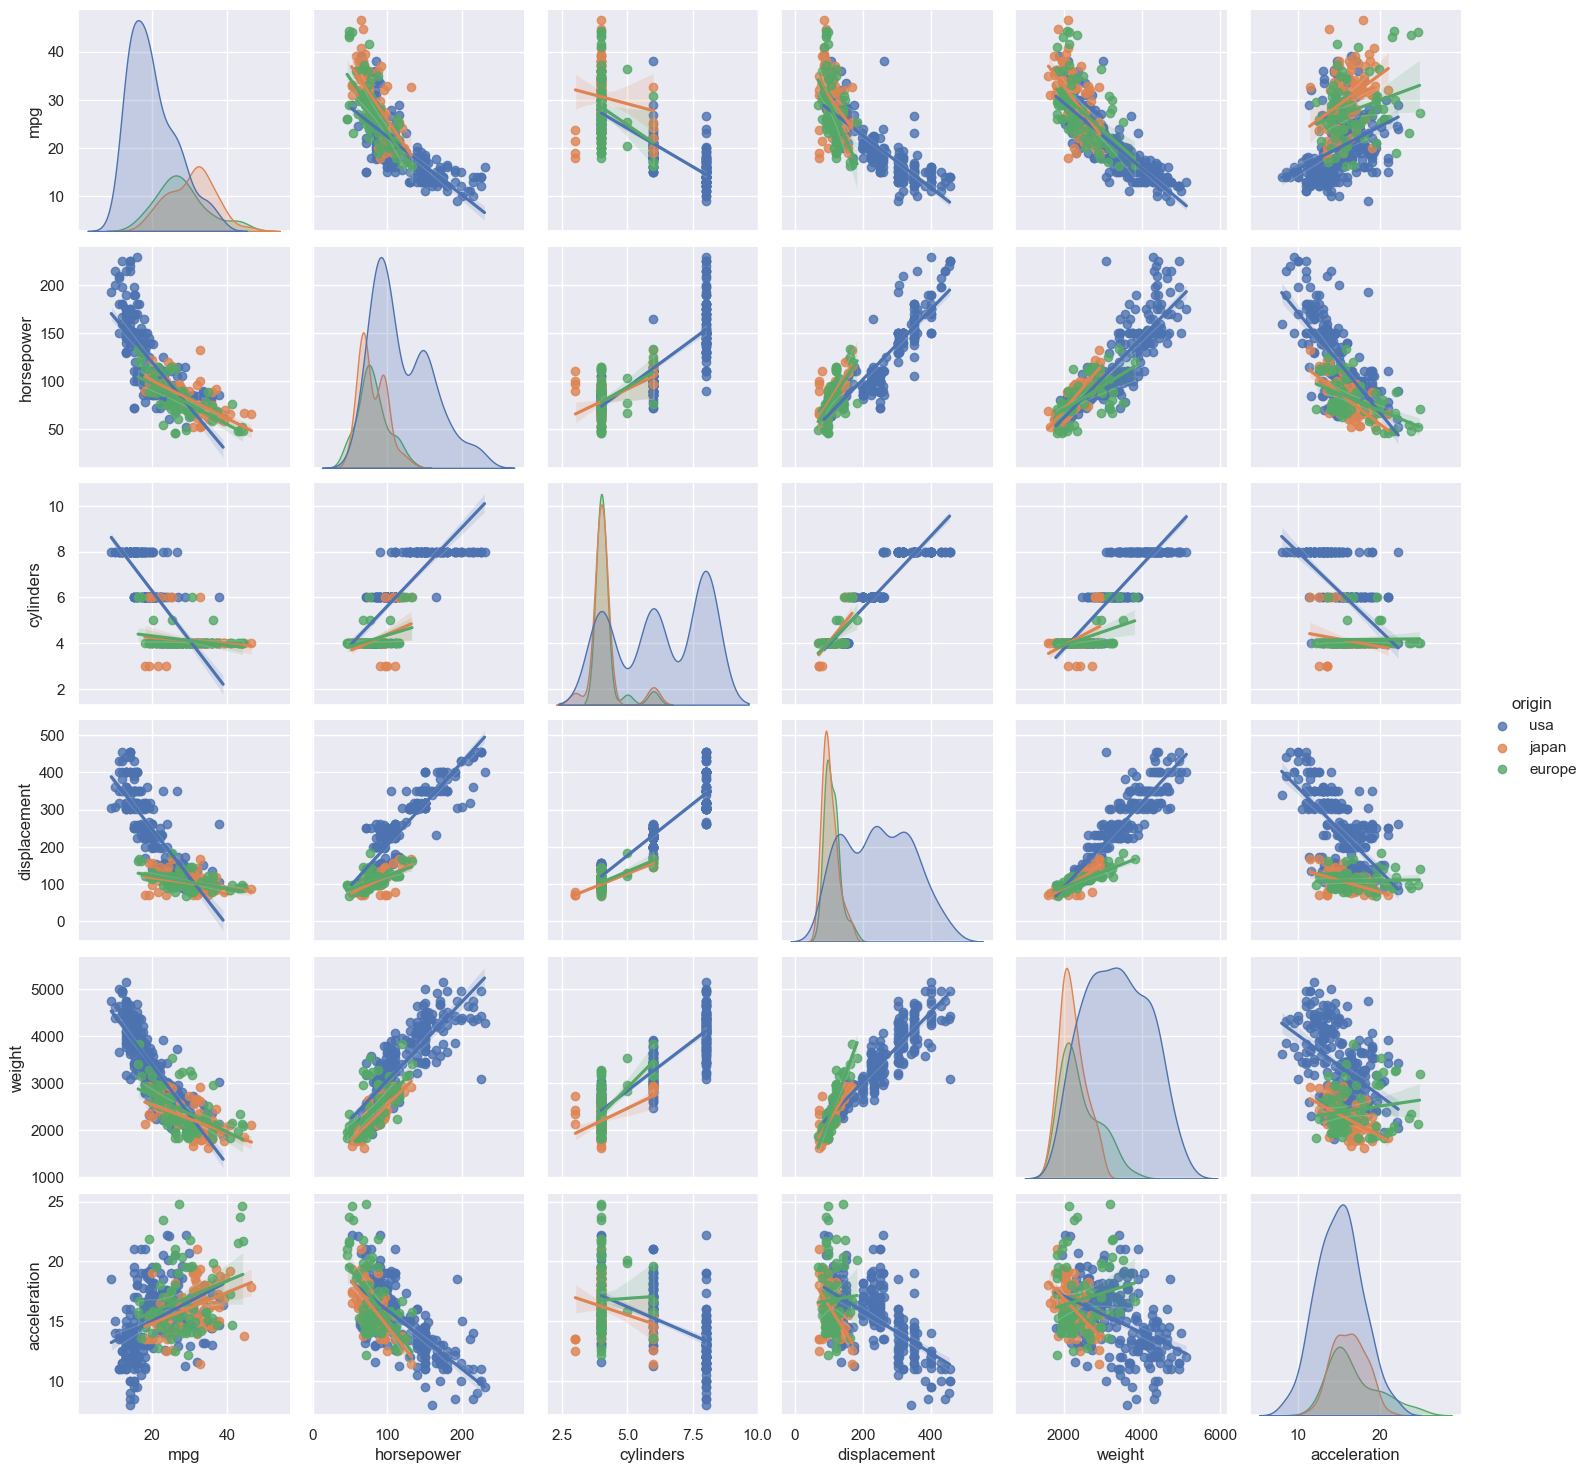

In [24]:
# 7: Fit a Simple Linear Regression
sns.pairplot(data, vars=['mpg', 'horsepower', 'cylinders', 'displacement', 'weight', 'acceleration'],
                      kind='reg', hue='origin')

In [25]:
# We can look at the fits individually too
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=data,hue='origin')
plot.set(ylim = (0,50))

TypeError: lmplot() got multiple values for argument 'data'

In [ ]:
var = 'horsepower'
plot = sns.lmplot(var,'mpg',data=data,hue='cylinders')
plot.set(ylim = (0,50))

## Example: Exploratory Analysis using Pandas Profiling

In [2]:
# pip install pandas-profiling
pip install ydata-profiling

SyntaxError: invalid syntax (1766110490.py, line 2)

In [2]:
from pandas_profiling import ProfileReport

ImportError: cannot import name 'ABCIndexClass' from 'pandas.core.dtypes.generic' (D:\Anaconda\lib\site-packages\pandas\core\dtypes\generic.py)

In [ ]:
import pandas_profiling
pandas_profiling.ProfileReport(data)